# EDA and Feature Engineering on Black Friday Dataset

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the first dataset
df_train = pd.read_csv('train.csv')
df_train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [3]:
df_train.shape

(550068, 12)

In [4]:
#Load the second dataset
df_test = pd.read_csv('test.csv')
df_test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [5]:
df_test.shape

(233599, 11)

In [6]:
#Merge both the datasets
df_black_friday = df_train.append(df_test)

In [7]:
df_black_friday.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [8]:
df_black_friday.shape

(783667, 12)

In [9]:
#Basic steps
df_black_friday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df_black_friday.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  7.836670e+05  783667.000000   783667.000000       783667.000000   
mean   1.003029e+06       8.079300        0.409777            5.366196   
std    1.727267e+03       6.522206        0.491793            3.878160   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001519e+06       2.000000        0.000000            1.000000   
50%    1.003075e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       537685.000000       237858.000000  550068.000000  
mean             9.844506           12.668605    9263.968713  
std              5.089093            4.125510    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [11]:
#Drop the column which will not impact the model , so in this dataset userID column can be dropped
df_black_friday.drop(['User_ID'],axis=1,inplace=True)
df_black_friday

Product_ID Gender    Age  Occupation City_Category  \
0       P00069042      F   0-17          10             A   
1       P00248942      F   0-17          10             A   
2       P00087842      F   0-17          10             A   
3       P00085442      F   0-17          10             A   
4       P00285442      M    55+          16             C   
...           ...    ...    ...         ...           ...   
233594  P00118942      F  26-35          15             B   
233595  P00254642      F  26-35          15             B   
233596  P00031842      F  26-35          15             B   
233597  P00124742      F  46-50           1             C   
233598  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
233594                         4+               1                   8   
233595                         4+               1                   5   
233596                         4+               1                   1   
233597                         4+               0                  10   
233598                         4+               1                   4   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN    8370.0  
1                      6.0                14.0   15200.0  
2                      NaN                 NaN    1422.0  
3                     14.0                 NaN    1057.0  
4                      NaN                 NaN    7969.0  
...                    ...                 ...       ...  
233594                 NaN                 NaN       NaN  
233595                 8.0                 NaN       NaN  
233596                 5.0                12.0       NaN  
233597                16.0                 NaN       NaN  
233598                 5.0                 NaN       NaN  

[783667 rows x 11 columns]

In [12]:
#Now we need to convert our categorical columns into numerical column for better processing
#Let's convert gender column to numerical, for this we will use map function
df_black_friday['Gender'] = df_black_friday['Gender'].map({'F':0,'M':1})
df_black_friday.head()

Product_ID  Gender   Age  Occupation City_Category  \
0  P00069042       0  0-17          10             A   
1  P00248942       0  0-17          10             A   
2  P00087842       0  0-17          10             A   
3  P00085442       0  0-17          10             A   
4  P00285442       1   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [13]:
#Next Let's convert Age column to numerical
df_black_friday['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df_black_friday['Age'] = df_black_friday['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df_black_friday.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [15]:
#Next Let's convert City_Category column to numerical 
df_city = pd.get_dummies(df_black_friday['City_Category'],drop_first=True)

In [16]:
df_black_friday = pd.concat([df_black_friday,df_city],axis=1)
df_black_friday.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  B  C  
0                 NaN                 NaN    8370.0  0  0  
1                 6.0                14.0   15200.0  0  0  
2                 NaN                 NaN    1422.0  0  0  
3                14.0                 NaN    1057.0  0  0  
4                 NaN                 NaN    7969.0  0  1

In [17]:
#Now we don't need the city category column as we have B and C to represent city_category column, so better to drop it
df_black_friday.drop(['City_Category'],axis=1,inplace=True)
df_black_friday.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [18]:
#Let's handle the missing values, as missing values can affect negatively our model
df_black_friday.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
# Focus on replacing missing values
# let's handle the missing values in product_category_2 columns
df_black_friday['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [20]:
#Let's replace the nan values with mode
df_black_friday['Product_Category_2'].mode()[0]

8.0

In [21]:
df_black_friday['Product_Category_2'] = df_black_friday['Product_Category_2'].fillna(df_black_friday['Product_Category_2'].mode()[0])

In [22]:
df_black_friday['Product_Category_2'].isnull().sum()

0

In [23]:
# let's handle the missing values in product_category_3 columns
df_black_friday['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [24]:
#Let's replace the nan values with mode
df_black_friday['Product_Category_3'].mode()[0]

16.0

In [25]:
df_black_friday['Product_Category_3'] = df_black_friday['Product_Category_3'].fillna(df_black_friday['Product_Category_3'].mode()[0])

In [26]:
df_black_friday['Product_Category_3'].isna().sum()

0

In [27]:
df_black_friday['Stay_In_Current_City_Years'] = df_black_friday['Stay_In_Current_City_Years'].str.replace('+','')
df_black_friday['Stay_In_Current_City_Years'].head()

C:\Users\ketan\AppData\Local\Temp/ipykernel_5692/1932727419.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_black_friday['Stay_In_Current_City_Years'] = df_black_friday['Stay_In_Current_City_Years'].str.replace('+','')


0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [28]:
df_black_friday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [29]:
#Stay in current city years is of object type, so let's convert it innto integer
df_black_friday['Stay_In_Current_City_Years'] = df_black_friday['Stay_In_Current_City_Years'].astype(int)
df_black_friday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [30]:
df_black_friday['B'] = df_black_friday['B'].astype(int)
df_black_friday['C'] = df_black_friday['C'].astype(int)
df_black_friday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\ketan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


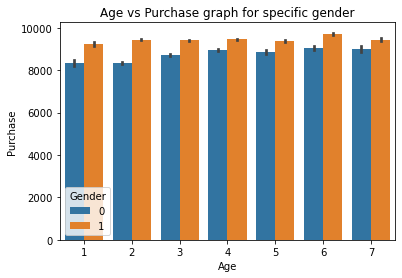

In [31]:
# Visualization using barplot
sns.barplot('Age','Purchase',hue='Gender',data=df_black_friday)
plt.title('Age vs Purchase graph for specific gender')
plt.show()

<b>Observation:
    By above barplot we can clearly see that, Maximum Purchase is done my males as compared to females for every age group </b>

C:\Users\ketan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


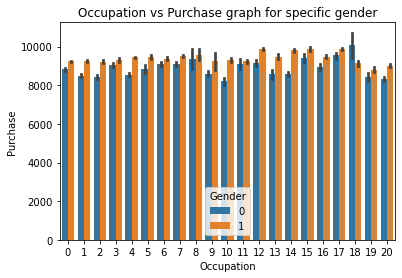

In [32]:
# Visualization using barplot 
sns.barplot('Occupation','Purchase',hue='Gender',data=df_black_friday)
plt.title('Occupation vs Purchase graph for specific gender')
plt.show()

C:\Users\ketan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


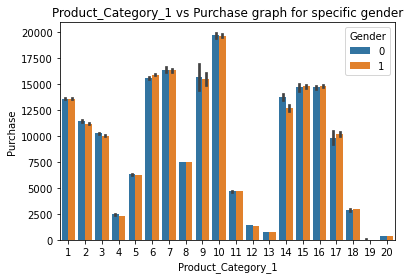

In [33]:
# Visualization using barplot
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_black_friday)
plt.title('Product_Category_1 vs Purchase graph for specific gender')
plt.show()

C:\Users\ketan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


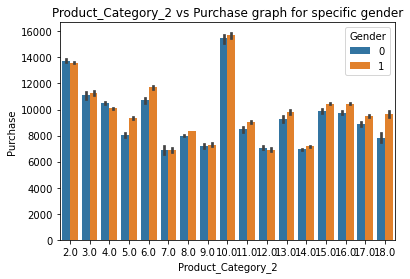

In [34]:
# Visualization using barplot
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df_black_friday)
plt.title('Product_Category_2 vs Purchase graph for specific gender')
plt.show()

C:\Users\ketan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


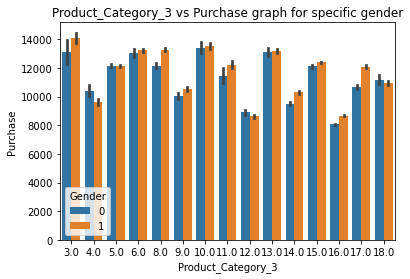

In [35]:
# Visualization using barplot
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df_black_friday)
plt.title('Product_Category_3 vs Purchase graph for specific gender')
plt.show()

<b> Observation:
        Product Category 1 has highest purchase compared to 2 and 3, because Product_Category_1 has purchase near to 20000</b>

In [36]:
df_test = df_black_friday[df_black_friday['Purchase'].isnull()]
df_test

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0       P00128942       1    5           7                           2   
1       P00113442       1    3          17                           0   
2       P00288442       0    4           1                           4   
3       P00145342       0    4           1                           4   
4       P00053842       0    3           1                           1   
...           ...     ...  ...         ...                         ...   
233594  P00118942       0    3          15                           4   
233595  P00254642       0    3          15                           4   
233596  P00031842       0    3          15                           4   
233597  P00124742       0    5           1                           4   
233598  P00316642       0    5           0                           4   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    1                   1                11.0   
1                    0                   3                 5.0   
2                    1                   5                14.0   
3                    1                   4                 9.0   
4                    0                   4                 5.0   
...                ...                 ...                 ...   
233594               1                   8                 8.0   
233595               1                   5                 8.0   
233596               1                   1                 5.0   
233597               0                  10                16.0   
233598               1                   4                 5.0   

        Product_Category_3  Purchase  B  C  
0                     16.0       NaN  1  0  
1                     16.0       NaN  0  1  
2                     16.0       NaN  1  0  
3                     16.0       NaN  1  0  
4                     12.0       NaN  0  1  
...                    ...       ... .. ..  
233594                16.0       NaN  1  0  
233595                16.0       NaN  1  0  
233596                12.0       NaN  1  0  
233597                16.0       NaN  0  1  
233598                16.0       NaN  1  0  

[233599 rows x 12 columns]

In [37]:
df_train = df_black_friday[~df_black_friday['Purchase'].isnull()]
df_train

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0       P00069042       0    1          10                           2   
1       P00248942       0    1          10                           2   
2       P00087842       0    1          10                           2   
3       P00085442       0    1          10                           2   
4       P00285442       1    7          16                           4   
...           ...     ...  ...         ...                         ...   
550063  P00372445       1    6          13                           1   
550064  P00375436       0    3           1                           3   
550065  P00375436       0    3          15                           4   
550066  P00375436       0    7           1                           2   
550067  P00371644       0    5           0                           4   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 8.0   
1                    0                   1                 6.0   
2                    0                  12                 8.0   
3                    0                  12                14.0   
4                    0                   8                 8.0   
...                ...                 ...                 ...   
550063               1                  20                 8.0   
550064               0                  20                 8.0   
550065               1                  20                 8.0   
550066               0                  20                 8.0   
550067               1                  20                 8.0   

        Product_Category_3  Purchase  B  C  
0                     16.0    8370.0  0  0  
1                     14.0   15200.0  0  0  
2                     16.0    1422.0  0  0  
3                     16.0    1057.0  0  0  
4                     16.0    7969.0  0  1  
...                    ...       ... .. ..  
550063                16.0     368.0  1  0  
550064                16.0     371.0  0  1  
550065                16.0     137.0  1  0  
550066                16.0     365.0  0  1  
550067                16.0     490.0  1  0  

[550068 rows x 12 columns]

In [39]:
X = df_train.drop('Purchase',axis=1)
X

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0       P00069042       0    1          10                           2   
1       P00248942       0    1          10                           2   
2       P00087842       0    1          10                           2   
3       P00085442       0    1          10                           2   
4       P00285442       1    7          16                           4   
...           ...     ...  ...         ...                         ...   
550063  P00372445       1    6          13                           1   
550064  P00375436       0    3           1                           3   
550065  P00375436       0    3          15                           4   
550066  P00375436       0    7           1                           2   
550067  P00371644       0    5           0                           4   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 8.0   
1                    0                   1                 6.0   
2                    0                  12                 8.0   
3                    0                  12                14.0   
4                    0                   8                 8.0   
...                ...                 ...                 ...   
550063               1                  20                 8.0   
550064               0                  20                 8.0   
550065               1                  20                 8.0   
550066               0                  20                 8.0   
550067               1                  20                 8.0   

        Product_Category_3  B  C  
0                     16.0  0  0  
1                     14.0  0  0  
2                     16.0  0  0  
3                     16.0  0  0  
4                     16.0  0  1  
...                    ... .. ..  
550063                16.0  1  0  
550064                16.0  0  1  
550065                16.0  1  0  
550066                16.0  0  1  
550067                16.0  1  0  

[550068 rows x 11 columns]

In [41]:
X.shape

(550068, 11)

In [42]:
Y = df_train['Purchase']
Y.shape

(550068,)

In [43]:
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=40)

In [45]:
x_train.drop('Product_ID',axis=1,inplace=True)
x_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\ketan\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)